In [27]:
import re
import os
import shutil
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [28]:
directory_path = '/Users/williamnehemia/Documents/Skripsi/TugasAkhir/DataTahap7(DataCleaning)'

files = os.listdir(directory_path)
files_new = []

for file in files:
    if '.DS_Store' not in file:
        files_new.append(file)

In [29]:
jumlah_kalimat = {}
for file in files_new:
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/DataTahap7(DataCleaning)/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            if len(line) > 0:
                jumlah_titik = line.count('.')
                if jumlah_titik in jumlah_kalimat:
                    curr = jumlah_kalimat[jumlah_titik] + 1
                    jumlah_kalimat[jumlah_titik] = curr
                else:
                    jumlah_kalimat[jumlah_titik] = 1

In [30]:
keys_jumlah_kalimat = list(jumlah_kalimat.keys())
values_jumlah_kalimat = list(jumlah_kalimat.values())
print(keys_jumlah_kalimat)
print(values_jumlah_kalimat)

[3, 4, 6, 5, 16, 8, 7, 11, 13, 12, 9, 10, 1, 14, 15, 20, 2, 19, 17, 18]
[2267, 1835, 977, 1271, 16, 506, 702, 49, 28, 37, 346, 264, 5, 12, 14, 1, 7, 2, 6, 1]


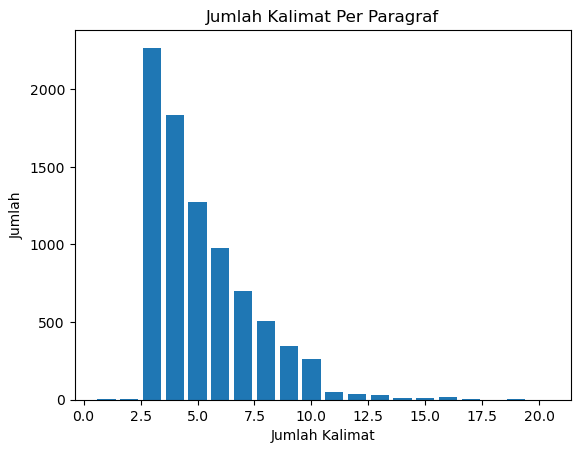

In [31]:
plt.bar(keys_jumlah_kalimat, values_jumlah_kalimat)


plt.xlabel('Jumlah Kalimat')
plt.ylabel('Jumlah')
plt.title('Jumlah Kalimat Per Paragraf')

# Show the plot
plt.show()

In [32]:
jumlah_paragraf = {}
for file in files_new:
    jumlah_paragraf_curr = 0
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/DataTahap7(DataCleaning)/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            if len(line) > 0:
                jumlah_paragraf_curr += 1
    if jumlah_paragraf_curr in jumlah_paragraf:
        curr = jumlah_paragraf[jumlah_paragraf_curr] + 1
        jumlah_paragraf[jumlah_paragraf_curr]  = curr
    else:
        jumlah_paragraf[jumlah_paragraf_curr] = 1
        

In [33]:
keys_jumlah_paragraf = list(jumlah_paragraf.keys())
values_jumlah_paragraf = list(jumlah_paragraf.values())
print(keys_jumlah_paragraf)
print(values_jumlah_paragraf)

[4, 30, 7, 3, 6, 19, 16, 5, 12, 1, 2, 14, 11, 13, 8, 10, 46, 25, 32, 9, 49, 28, 22, 17, 50, 26, 15, 27, 39, 21, 18, 52, 35, 41, 20, 23, 57, 29, 47, 31, 34, 24, 54]
[87, 4, 68, 86, 67, 18, 21, 95, 19, 40, 88, 20, 46, 29, 61, 35, 2, 2, 1, 53, 1, 4, 6, 8, 1, 8, 14, 7, 1, 9, 13, 1, 3, 2, 7, 5, 2, 2, 1, 2, 2, 2, 1]


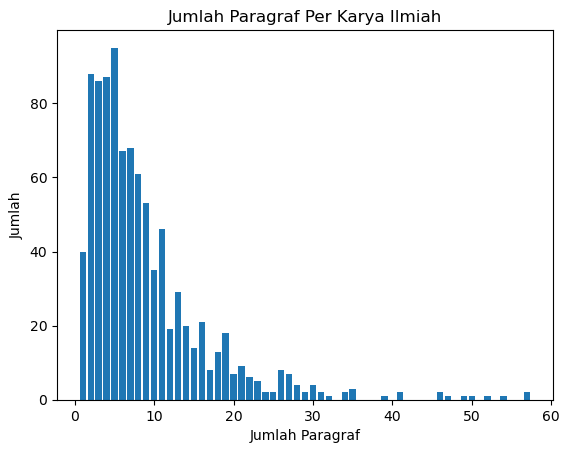

In [34]:
plt.bar(keys_jumlah_paragraf, values_jumlah_paragraf)


plt.xlabel('Jumlah Paragraf')
plt.ylabel('Jumlah')
plt.title('Jumlah Paragraf Per Karya Ilmiah')

# Show the plot
plt.show()

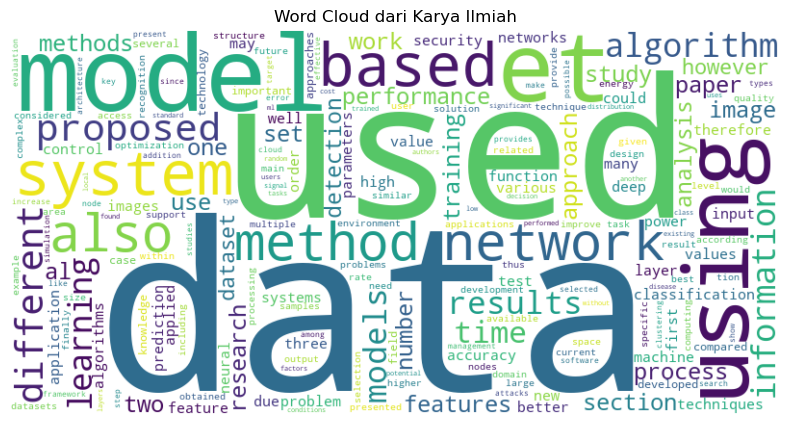

In [35]:
all_text = ""
for file in files_new:
    jumlah_paragraf_curr = 0
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/DataTahap7(DataCleaning)/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            all_text += " " + line
tokens = word_tokenize(all_text)

stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

word_freq = Counter(tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud dari Karya Ilmiah')
plt.show()